# EDA ON ZOMATO DATASET


## About Dataset

This dataset contains the collection of all the zomato associated resturants in the Indian city of Banglore. 
Its a fairly large dataset having 51717 rows ands 17 columns.

In [1]:
# Lets import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Display the dataset

df=pd.read_csv('zomato.csv')
df.head()                                      #.head() usually prints first 5 entries

# Looking last 5 rows of dataset 
#df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
# Check the shape of the dataset

df.shape

(51717, 17)

as we see that given datset is quite large, since there are 51717 number of Rows and 17 number of columns or features present.

In [4]:
# Checking the feature name 
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

1) As we see that there are 16 categorical features and only 1 numeric feature.

2) but by observing dataset we can infer that there are some features that are not actualy categorical so we have to perform encoding to convert them into numerical features, we will se them later.

In [7]:
## Checking statistical summary of all features

df.describe(include='all')     #'all' : All columns of the input will be included in the output.

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DATA CLEANING

In [8]:
# Checking null values 

df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## Observations

-  so in our dataset some features has null values
-  we need to treat these null values to get better analysis of dataset



As seen from dataframe we get clear that

1) Feature name "url" doesnt give much information about exploring dataset bcoz it is nothing but websites unique address

2) Feature name "phone" also gives only the contact info of restaurants.

3) Feature name "address" is only the address of that perticular restaurants.

4) Feature name "dish_liked" gives only which dishes in restaurants are being liked by the users.

5) Feature name "reviews_list" is reviews by users to that restaurants.

6) Feature name "menu_item" is menu in restaurants.

Since these features in dataset not gives any information other than above mentioned. So it is better to drop them to simplify dataset

In [9]:
# Droppping all unnecessary columns

df= df.drop(['url', 'address', 'phone','dish_liked','reviews_list', 'menu_item'], axis=1)

In [10]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [11]:
df.shape

(51717, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [13]:
# Checking for duplicated values
df[df.duplicated()].columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

as we see that in all columns there are duplicate values present.

since these duplicate values in feature makes the analysis more biased so it is necessary to drop them to make better observation of data.

In [14]:
df=df.drop_duplicates()   #Return DataFrame with duplicate rows removed.
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [15]:
df.shape

(51609, 11)

So by above code we see that after droping duplicates values, number of rows or fields get reduced i.e. from 51717 to 51609.

# Exploring Features

1) Analysing "rate" columns since ther are lot of null values present

In [16]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

As we see that there are some faulty values in rating column = "NEW", "-" and replace them with "nan = i.e. by null values"

Since "rate" columns goves information about that persons views on that restaurants.

But these values does not give, so we have to remove them.

In [17]:
df.rate

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51609, dtype: object

In [18]:
# Defining a function to handel the rating column and also covert them from text to integer form


def treat_rate(values):
    if (values=="NEW" or values=="-"):
        return np.nan
    else:
        values=str(values).split('/')   
                                        # since split method splits string into list of int,
                                        #i.e."4.1/5" will split it into 4.1 and /5 ---> list is =   values=[4.1][/5] 
        values=values[0]
                                        # But here we only need numerator of rating because all the rating are out of 5
        return float(values) 
                                        # Since we want these values in floating form.
                                 

                    
# Now applying the function on "rate" column  
df.rate=df.rate.apply(treat_rate)
                                 



C:\Users\Justin Thomas\AppData\Local\Temp\ipykernel_1172\4146839669.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rate=df.rate.apply(treat_rate)


In [19]:
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [20]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         41590 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


name                               0
online_order                       0
book_table                         0
rate                           10019
votes                              0
location                          21
rest_type                        227
cuisines                          45
approx_cost(for two people)      344
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [21]:
# Now we have to check for the missing values 'Nan', here as it is a numerical list so we can use the mean of the list in place of NaN values

df.rate.fillna(df.rate.mean(), inplace= True)   # don't put df.rate = df.rate.fillna(df.rate.mean()) will return nan values only

C:\Users\Justin Thomas\AppData\Local\Temp\ipykernel_1172\333105584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rate.fillna(df.rate.mean(), inplace= True)   # don't put df.rate = df.rate.fillna(df.rate.mean()) will return nan values only


In [22]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

Rate column has now no null values.

Now as compare to size of dataset in remaining features like ["location", "rest_type", "cuisines", "approx_cost(for two people)"] has very low null values present so if we drop them directly it wont affect our analysis much.

In [23]:
## So droping other features null values

df.dropna(inplace = True)

C:\Users\Justin Thomas\AppData\Local\Temp\ipykernel_1172\1460711577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [24]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

Now in our dataset we dont have any null values present so we can move further do explore other analysis.

## 2) Now analysing Restaurant type feature

In [25]:
df['rest_type'].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

observations =

1) most of the restaurants in dataset are "Quick Bites" types restaurent i.e. 19010 times ocurrences

2) then followed by "Casual Dining" occures 10253 time in dataset

since in restaurent type there are lot of types which have less number of occurence in dataset

so for the better understanding of feature we will groups these rest_type which have less than 1000 counts

In [26]:
rest_type = df['rest_type'].value_counts()
rest_type

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [27]:
other_resto_types = rest_type[rest_type <1000]

In [28]:
other_resto_types


Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [29]:
type(other_resto_types)

pandas.core.series.Series

In [30]:
def handel_rest_type(type):
    if (type in other_resto_types):
        return 'other_resto_type'
    else:
        return type


df.rest_type=df.rest_type.apply(handel_rest_type)
    
        

C:\Users\Justin Thomas\AppData\Local\Temp\ipykernel_1172\1579565604.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rest_type=df.rest_type.apply(handel_rest_type)


In [31]:
df.rest_type.value_counts()

Quick Bites           19010
Casual Dining         10253
other_resto_type       9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

## 3) Now Analysing where are these restaurants are located i.e. "location" column

In [32]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51042, dtype: object

In [33]:
df['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

observation =

1) most of the restaurants are in BTM area i.e. 5056 number of restaurants, since we can infer that this area is highly populated and has good rich in culture.

2) since there are also lot of such location are present in dataset which has less number of restaurants.

3) so it is better for analysis and visualization purpose we can groups these location like we did for rest_type feature.

4) grouping those locations which has less than 500 restaurant counts and storing them in "other lcation" variables.

In [34]:
locations = df['location'].value_counts() 

In [35]:
other_locations=locations[locations<500]

In [36]:
other_locations

Shivajinagar                     498
Cunningham Road                  490
Domlur                           482
Old Airport Road                 437
Ejipura                          433
Commercial Street                370
St. Marks Road                   343
Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            215
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    150
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
S

In [37]:
other_locations.value_counts().sum()

59

so ther are 59 columns which has less than 500 restaurants

In [38]:
# defining function 

def handle_location (location):
    if location in other_locations :
        return 'other locations'
    else:
        return location
    
# applying function
df['location'] = df['location'].apply(handle_location)

C:\Users\Justin Thomas\AppData\Local\Temp\ipykernel_1172\3109547047.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].apply(handle_location)


In [39]:
df['location'].value_counts()

other locations          8007
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

 so up till now we have treated very well "rate" column, "rest_type" column, "location" type column.

## 4) Now Analysing "Cuisines" feature i.e. Food styles

In [40]:
df.cuisines.value_counts()

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

In [41]:
cuisines=df.cuisines.value_counts()

In [42]:
less_num_cuisines=cuisines[cuisines<100]
less_num_cuisines

North Indian, Continental, Chinese          97
Juices                                      94
Fast Food, North Indian                     93
Bengali, North Indian                       93
Beverages, Juices                           90
                                            ..
North Indian, Chinese, Oriya, Mithai         1
Beverages, Burger                            1
North Indian, Mughlai, Lucknowi              1
Continental, Thai, North Indian, Chinese     1
North Indian, Chinese, Arabian, Momos        1
Name: cuisines, Length: 2635, dtype: int64

In [43]:
def handling_cuisines(values):
    if values in less_num_cuisines:
        return 'less_num_cuisines'
    else:
        return values

df.cuisines=df.cuisines.apply(handling_cuisines)

C:\Users\Justin Thomas\AppData\Local\Temp\ipykernel_1172\486785323.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cuisines=df.cuisines.apply(handling_cuisines)


In [44]:
df.cuisines.value_counts()

less_num_cuisines                      26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

So we observe that there are 26159 number of cuisines which have less than 100 styles of cooking in different restaurants which are present in our dataset

## 5) Now analysing cost of plate per cuisines in restaurant i.e. "approx_cost(for two people) feature

In [45]:
df['approx_cost(for two people)'].value_counts()

300      7531
400      6503
500      4929
200      4829
600      3687
         ... 
60          1
5,000       1
3,700       1
469         1
160         1
Name: approx_cost(for two people), Length: 70, dtype: int64

In [46]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

Observation=

1) as we see that data type of cost feature is object becoz of comas in between number when approx cost is above 999. i.e. 1,900 so on

2) so we have to remove these comas i.e. ","

In [47]:
# Writing functing to remove "," and convert this column into float

def handling_approx_cost(cost):
    cost = str(cost)
    if "," in cost:
        cost = cost.replace("," , "")           # we simply replaced coma with empty value
        return float(cost)                      # converting data type into float
    else:
        return float(cost)
    
# applying fun on feature
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(handling_approx_cost)

C:\Users\Justin Thomas\AppData\Local\Temp\ipykernel_1172\549720447.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(handling_approx_cost)


In [48]:
df['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [49]:
df['approx_cost(for two people)'].describe()

count    51042.000000
mean       555.782983
std        439.293333
min         40.000000
25%        300.000000
50%        400.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

Observation =

1) Now we have successfully perform operation on approx_cost feature

2) loweset cost per plate price is Rs. 40 in restaurant

3) highest cost per plate price is 6000 in some restaurants

## 6) Now Analysing listed_in(type) i.e. types of meals.

In [50]:
df['listed_in(type)']

0               Buffet
1               Buffet
2               Buffet
3               Buffet
4               Buffet
             ...      
51712    Pubs and bars
51713    Pubs and bars
51714    Pubs and bars
51715    Pubs and bars
51716    Pubs and bars
Name: listed_in(type), Length: 51042, dtype: object

In [51]:
df['listed_in(type)'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: listed_in(type), dtype: int64

Observations =

1) In restaurants most of the types of meals are for delivery i.e. 25579 i.e most of people tries to order food from restaurants

2) Then 17562 number of meal types are Dine-out i.e. means lot of peoples loves to eat outside from home i.e. in restaurants

3) 3559 number of meals types are in Desserts or sweets

4) 1703 number of types of meals are from cafes

5) 1084 numbers are of Drinks & nightlife data

6) 869 numbers are of buffet type of meals

7) 689 numbers of pubs and bars present in datset of banglore

## 7) Since "location" and "listed_in(city)" both gives same meaning. i.e. both columns shows area or location of restaurants in dataset

So for the better dataframe analysis we can drop one of them would not affect our analysis

Droping listed_in(city) column becoz we have already analysed "location" column in above point number (3) so it is not good thing to drop this feature.

In [52]:
df = df.drop(columns= 'listed_in(city)')

In [53]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

# Perfroming Data visualization

## 8) Number of restaurant in different locations

In [54]:
df['location'].value_counts()

other locations          8007
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

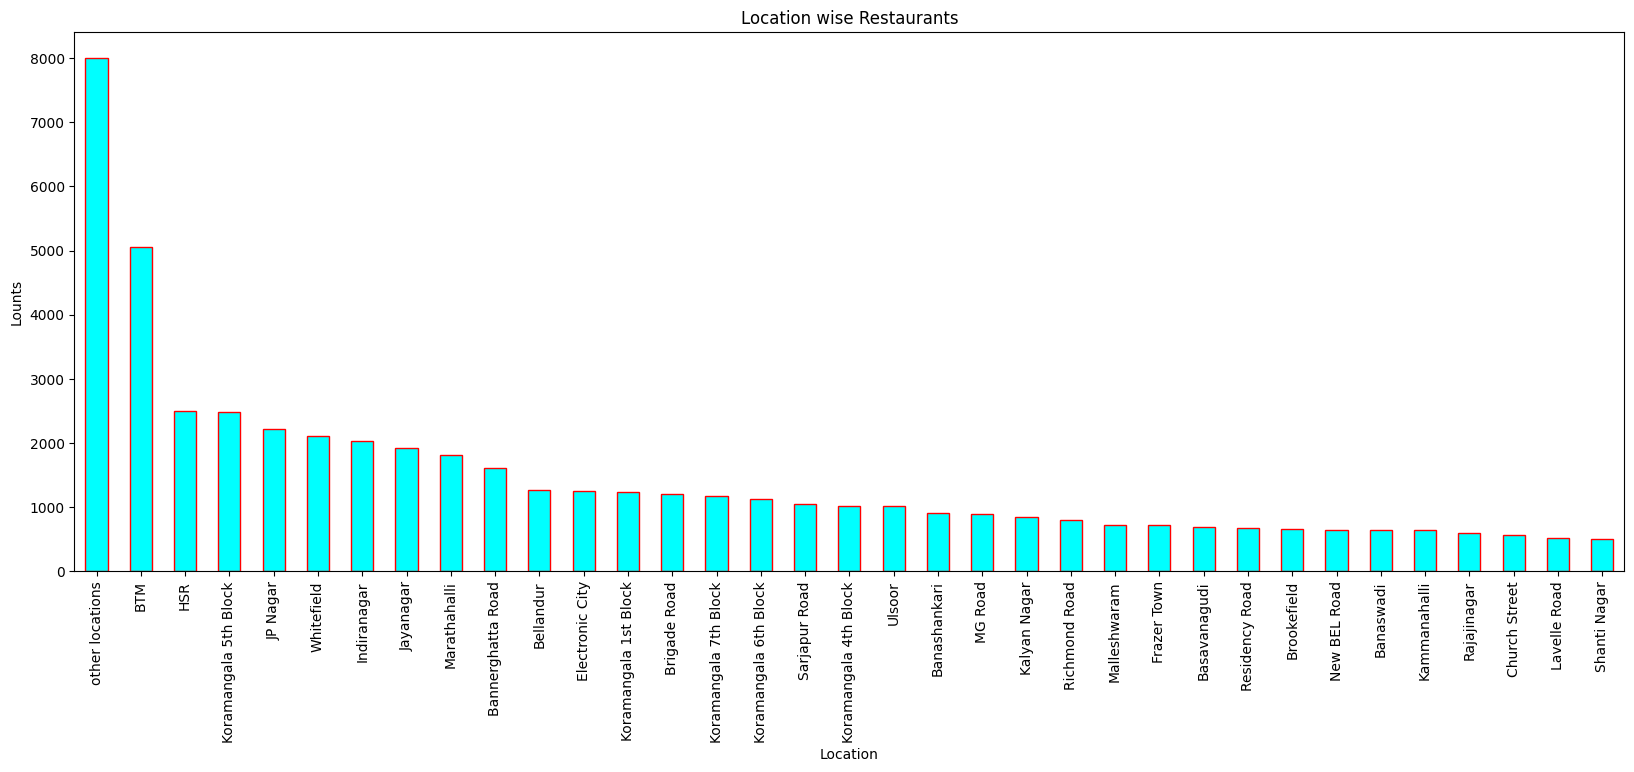

In [62]:
counts=df['location'].value_counts()
fig=plt.figure(figsize=(20,7))
ax=fig.gca()

counts.plot.bar(ax = ax, color='cyan', edgecolor= 'red' )
ax.set_title( 'Location wise Restaurants')
ax.set_xlabel('Location') 
ax.set_ylabel("Lounts")
plt.show()

Observation =

1) As BTM place has above 5000 plus number of restaurants

2) That means BTM is place where most of the people tries to go there or order some cuisines.

3) And Other location means lovcation which have less than 500 restaurents in dataset are quite high counts i.e. almost 8000 number of places are there which having <500 restaurants.

## 9) Checking Restaurants way of delivery for cuisines.

Looking whether restaurants have online delivery option or not

In [63]:
df['online_order'].value_counts()

Yes    30228
No     20814
Name: online_order, dtype: int64

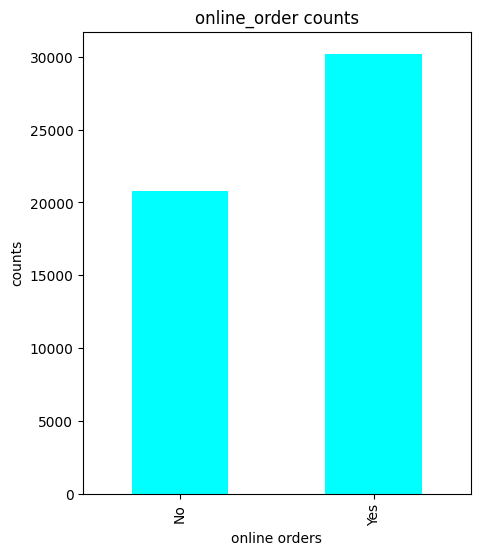

In [65]:
counts = df['online_order'].value_counts().sort_index()
fig = plt.figure(figsize=(5,6))
ax = fig.gca()
 
counts.plot.bar(ax = ax, color='cyan')
ax.set_title( 'online_order'+' counts')
ax.set_xlabel('online orders') 
ax.set_ylabel("counts")
plt.show()

Observations =

1) In Dataset 30228 restaurents have online delivery facility

2) 20814 restaurants are not having online delivery service.

## 10) Checking wheter restaurants have Booking Table facility or not


In [66]:
df['book_table'].value_counts()

No     44626
Yes     6416
Name: book_table, dtype: int64

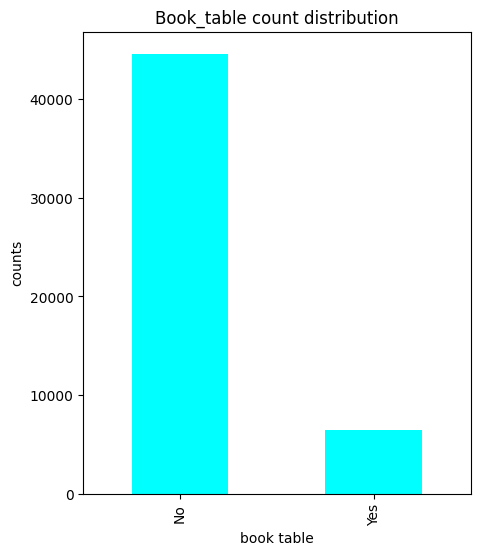

In [67]:
fig = plt.figure(figsize= (5,6))
counts = df['book_table'].value_counts()
ax= fig.gca()
counts.plot.bar(ax=ax, color='cyan')
plt.title('Book_table'+ ' count distribution')
plt.xlabel('book table')
plt.ylabel('counts')
plt.show()
             

Observation=

1) As we can see that Most of the restaurants (i.e. 44626 ) has no facility like booking table.

2) and in 6416 restaurants has book table facility.

## 11) Checking how much Ratings are given by peoples to restaurants online delivery

Using box plot to compare to features but Box plot gives some bad observation as feature have outliers

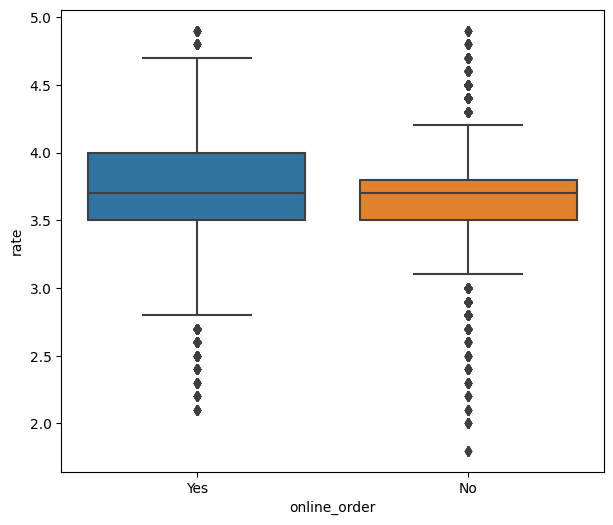

In [69]:
fig = plt.figure(figsize=(7,6))
ax= fig.gca()

sns.boxplot(x= df['online_order'], y= df['rate'])
plt.show()

Observations = These observation are due to Outliers present in features

1) whether restaurants having online or not the average rating to restaurants given by the customers is 3.70142

2) maximum rating for online delivery of restaurants by people is around 4.7

3) minimum rating for online delivery given by customer is around 2.7

4) And when people go directly to restaurants they give maximum of ratings around 4.4

5) And when people go directly to restaurants they give manimum of ratings around 3.3

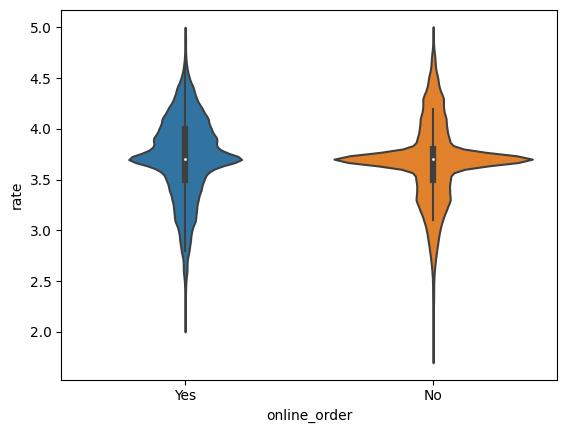

In [72]:
# Ploting Violin plot to overcome from outliers

sns.violinplot(x= df['online_order'], y= df['rate'])
plt.show()

Actual Observations from rating for restaurants online delivery =
1) whether restaurants having online or not the average rating to restaurants given by the customers is 3.70142

2) maximum rating for online delivery of restaurants by people is around 4.9

3) minimum rating for online delivery given by customer is around 2.1

4) And when people go directly to restaurants they give maximum of ratings around 4.9

5) And when people go directly to restaurants they give minimum of ratings around 1.8

## 12) Checking From which Location of restaurants recieving most online orders

Grouping locations of restaurants and there online orders

In [78]:
locationwise_online_order= df.groupby(['location','online_order'])['name'].count()

In [79]:
locationwise_online_order

location         online_order
BTM              No              1763
                 Yes             3293
Banashankari     No               397
                 Yes              505
Banaswadi        No               302
                                 ... 
Ulsoor           Yes              622
Whitefield       No               986
                 Yes             1119
other locations  No              3672
                 Yes             4335
Name: name, Length: 70, dtype: int64

<Axes: xlabel='location,online_order'>

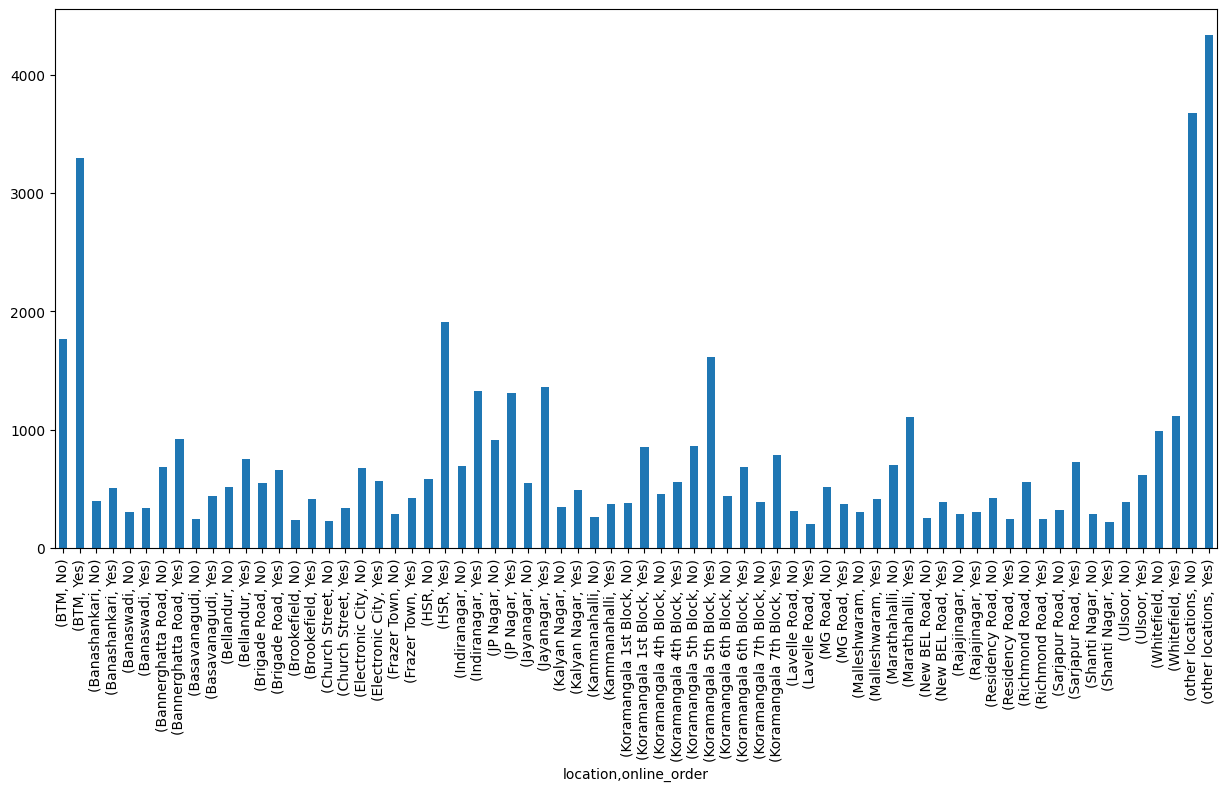

In [80]:
locationwise_online_order.plot.bar(figsize= (15,7))

observations=

1) As we have allready seen that most of the restaurant are present in BTM area and it is obvious things that most of there restaurant will have online delivery facility.

2) In HSR location around 2000 restaurants have online delivery facility.

## 13) Visualizing restaurants types and there ratings

ploting box plot


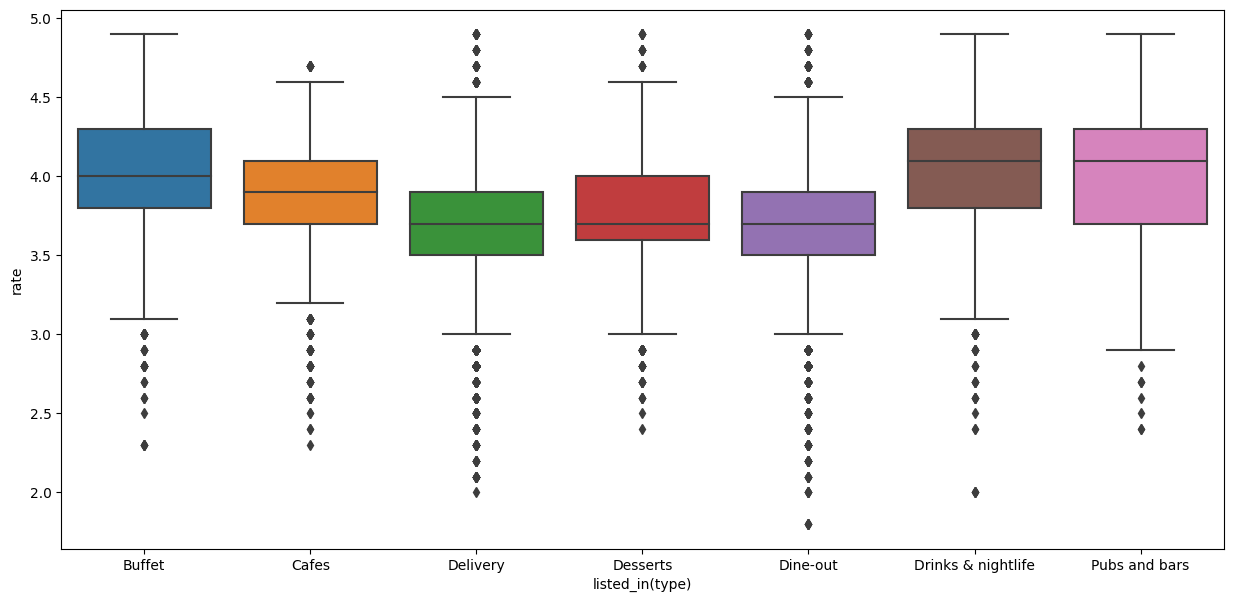

In [81]:
plt.figure(figsize=(15,7))
sns.boxplot(x= df['listed_in(type)'], y= df['rate'])
plt.show()

Observations =

1) So Drinks and nightlife Restaurants types has maximum avg rating around 4.2 among other 6 types of restaurants

2) Then Buffet restaurants have avg rating around 4.0

3) worst Rating for restaurants types are Delivery, Desserts, and Dine-out.

## 14) visualizing location wise Restaurant types
Grouping all given restaurants "types" and there respective "locations" by restaurants "names"

In [84]:
#creating a separate Dataframe of "location" as Row index, and Types of restaurants as (listed _in(type)) with there names as columns

loc_type_df = df.groupby(['listed_in(type)','location'])['name'].count()

In [85]:
loc_type_df.to_csv('loc_type.csv')
loc_type_df = pd.read_csv('loc_type.csv')
loc_type_df= pd.pivot_table(loc_type_df, values=None, index='location', columns='listed_in(type)',fill_value=0, aggfunc= np.sum)

In [86]:
loc_type_df

name                                   \
listed_in(type)       Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
other locations          150   225     4062      512     2792   

                                                        
listed_in(type)       Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar                           65            66  
JP Nagar                              51             7  
Jayanagar                             12             0  
Kalyan Nagar                          18             0  
Kammanahalli                           6             0  
Koramangala 1st Block                  7            16  
Koramangala 4th Block                 62            34  
Koramangala 5th Block                 84            58  
Koramangala 6th Block                 51            23  
Koramangala 7th Block                 25            25  
Lavelle Road                          59            34  
MG Road                               53            36  
Malleshwaram  

Text(0, 0.5, 'no of restaurants')

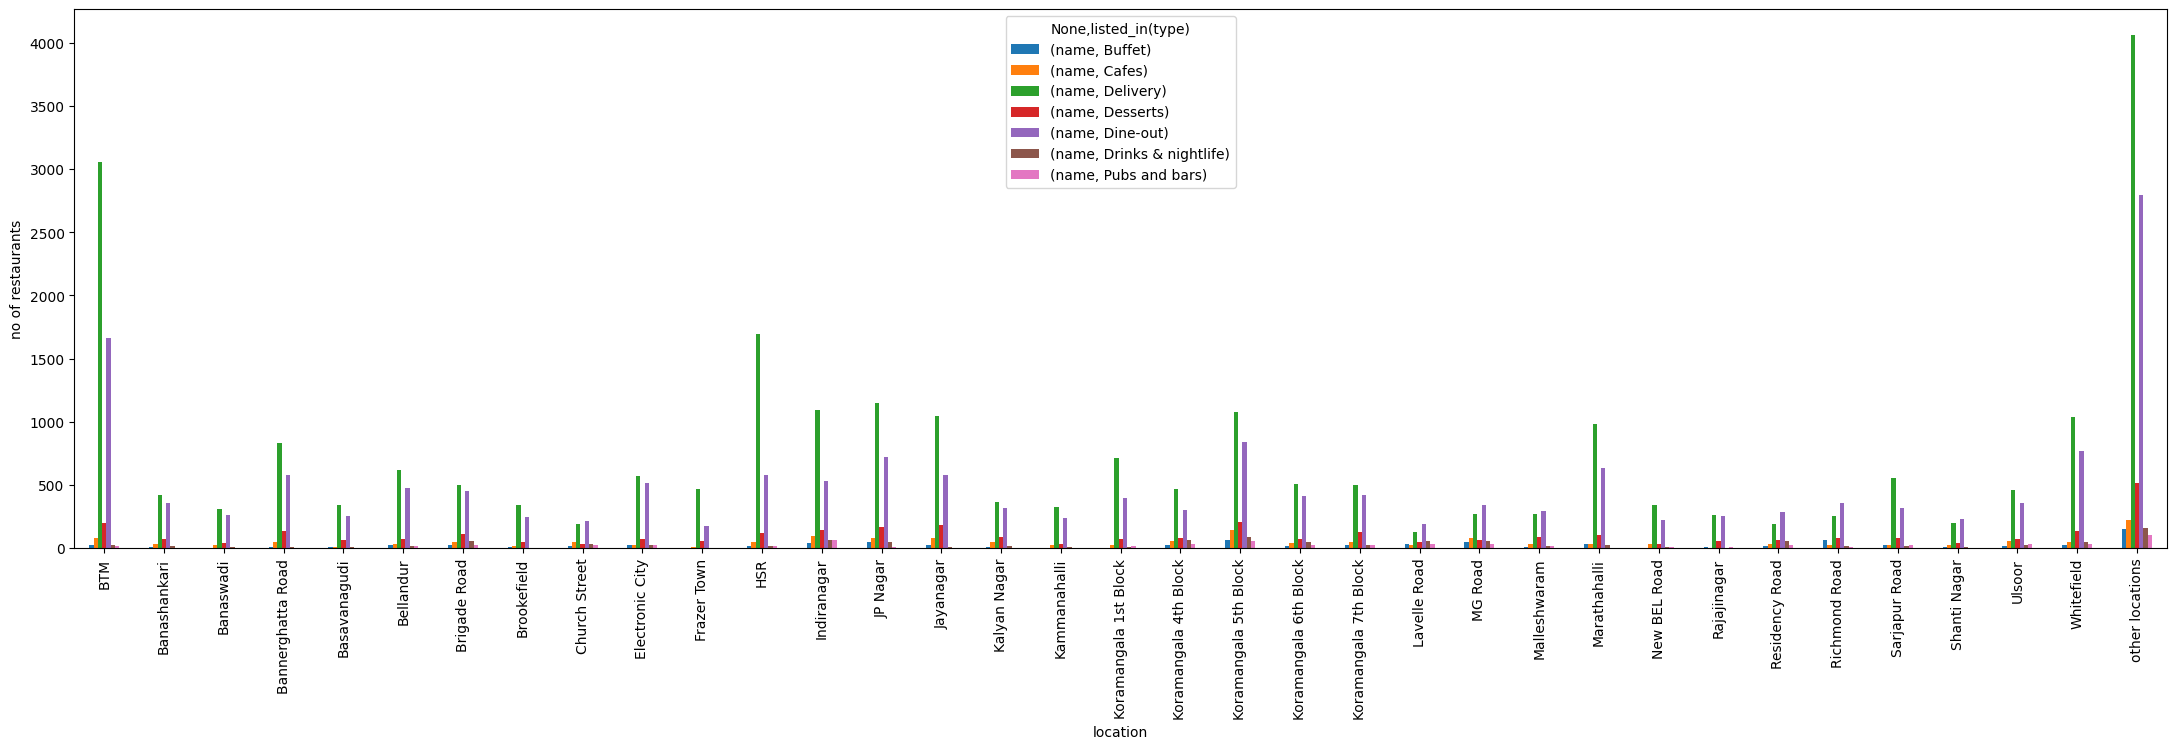

In [87]:
# ploting bar plot to get better visualization

 
loc_type_df.plot(kind = 'bar', figsize=(27,7))
plt.ylabel('no of restaurants')

Observations= By above plot we can get better analysis about how many restaurants types are listed in different location with there names on it.

## 15) Checking which location got most of votes

In [89]:
# making "location" column and "votes" column in one dataframe

loc_votes_df =df[['votes','location']]

# there are some duplicates values of number of  restaurants in location
# So Dropping duplicate values
loc_votes_df.drop_duplicates()

,votes,location
0,775,Banashankari
1,787,Banashankari
2,918,Banashankari
3,88,Banashankari
4,166,Basavanagudi
...,...,...
51328,152,Whitefield
51547,203,Whitefield
51606,848,other locations
51628,411,Bellandur


In [90]:
loc_votes_df2=loc_votes_df.groupby(['location'])['votes'].sum()        
# summing all the votes for that perticular location

loc_votes_df2=loc_votes_df2.to_frame()

In [91]:
loc_votes_df2.head()

,votes
location,
BTM,573668
Banashankari,162374
Banaswadi,34845
Bannerghatta Road,214989
Basavanagudi,94919


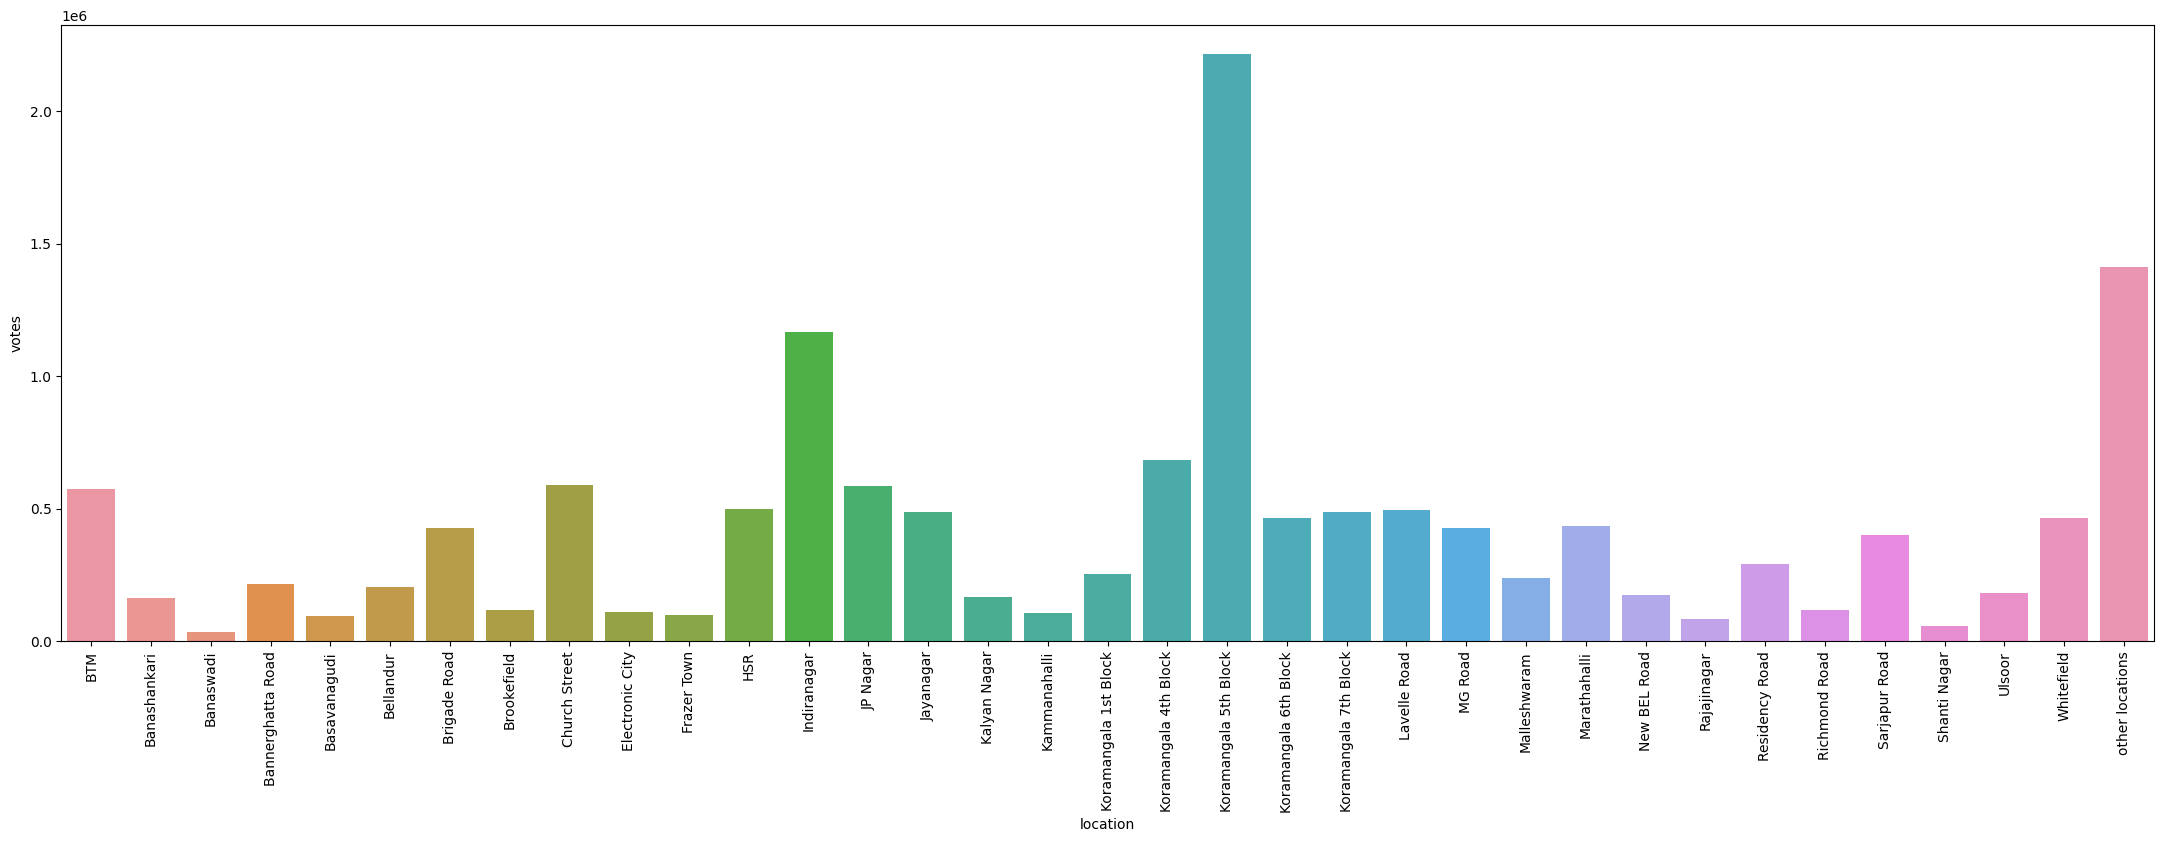

In [92]:
plt.figure(figsize= (27,8))
sns.barplot(x= loc_votes_df2.index,y= loc_votes_df2['votes'] )
plt.xticks(rotation=90)       ## Rotation used to not overlap values
plt.show()

Observations =

1) Here in graph Votes are in 10^6

2) So highest number of votes are from location "Koramangala 5th Block" is 2214083

3) and least number of votes are from "Banaswadi" location

## 16) Checking which cuisines got how much votes

Grouping "Votes" and "cuisines" feature

In [93]:
# creating dataframe

cuisines_votes_df = df[['votes','cuisines']]

In [94]:
cuisines_votes_df

,votes,cuisines
0,775,"North Indian, Mughlai, Chinese"
1,787,less_num_cuisines
2,918,less_num_cuisines
3,88,"South Indian, North Indian"
4,166,less_num_cuisines
...,...,...
51712,27,Continental
51713,0,Finger Food
51714,0,Finger Food
51715,236,Finger Food


In [95]:
# Droping Duplicates

cuisines_votes_df.drop_duplicates()

,votes,cuisines
0,775,"North Indian, Mughlai, Chinese"
1,787,less_num_cuisines
2,918,less_num_cuisines
3,88,"South Indian, North Indian"
4,166,less_num_cuisines
...,...,...
51547,203,"South Indian, North Indian, Chinese"
51555,8,"South Indian, Fast Food"
51590,515,"North Indian, Chinese"
51607,236,Finger Food


In [96]:
cuisines_votes_df2 = cuisines_votes_df.groupby(['cuisines'])['votes'].sum()
cuisines_votes_df2

cuisines
Andhra                                                 12299
Andhra, Biryani                                        40339
Arabian                                                16529
Bakery                                                 13148
Bakery, Desserts                                       45464
                                                      ...   
South Indian, North Indian                             14250
South Indian, North Indian, Chinese                    53586
South Indian, North Indian, Chinese, Street Food       33636
Street Food                                            11877
less_num_cuisines                                   11542182
Name: votes, Length: 70, dtype: int64

In [97]:
cuisines_votes_df2 = cuisines_votes_df2.to_frame()            ## Converting it into dataframe

In [98]:
cuisines_votes_df2.head()

,votes
cuisines,
Andhra,12299
"Andhra, Biryani",40339
Arabian,16529
Bakery,13148
"Bakery, Desserts",45464


In [99]:
cuisines_votes_df2= cuisines_votes_df2.sort_values('votes',ascending=False)
cuisines_votes_df2.head()

,votes
cuisines,
less_num_cuisines,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [100]:
# Removing first row i.e. "less_num_cuisines" becoz it will get biased visualization
cuisines_votes_df2= cuisines_votes_df2.iloc[1: , :]

In [101]:
cuisines_votes_df2.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


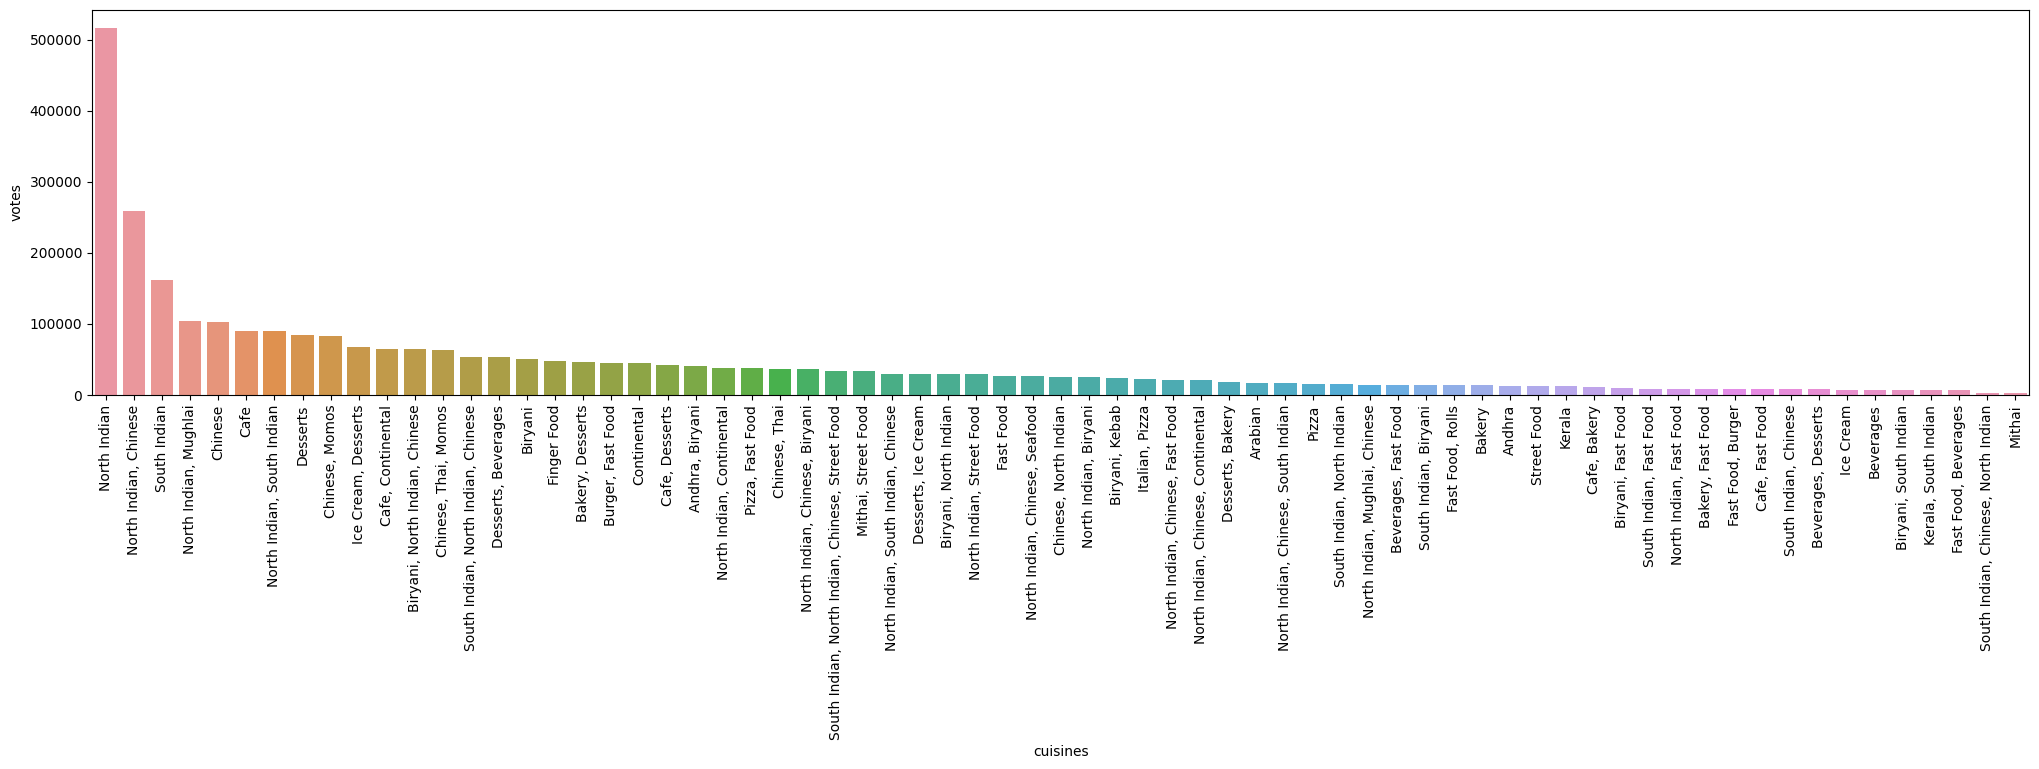

In [102]:
plt.figure(figsize=(25,5))
sns.barplot(x=cuisines_votes_df2.index,y=cuisines_votes_df2['votes'])
plt.xticks(rotation=90)
plt.show()

Observations =

1) from above bar plot we see that for "North indian" foods restaurants gets more number of votes i.e. 516310

2) for "north indian chinese" restaurants gets 258225 votes

3) For "mithai" food items restaurants gets lowest votings.